# Example 1. Principal Component Analysis, PCA
---

The alternative way for reducing the feature dimensions is **Principle component analysis (PCA)** which projects the original feature space to a new space that has large variance within different types of data. The components which makes the new space containing and compressing the properties of the original features, i.e. the reduction keeps the information of orignial number of features $D$. We call it them **principle components**. The projection from original feature space $x_n$ to the principle components for certain data point $n$ is

$$
\begin{equation}
s_{n,\,i} = u_i^T x_n\ ,
\end{equation}
$$

where $u_i$ is a unit vector alone a component. For projecting to multi-components, we can compose a projection matrix $W$ which is made of $[u_1,\,u_2,...,\,u_M]^T$ where $M\leq D$ as 

$$
\begin{equation}
x^{'}_n = W x_n = [s_1,\,s_2,...,\,s_M]_n\ ,
\end{equation}
$$

where the dimension of $W$ is $D\times M$. To obtain the priciple components and projection matrix, we start from looking the overall data. The mean of the feature vector obtained from data $N$ is 

$$
\begin{equation}
\bar{x} = \frac{1}{N}\sum_n^N{x_n}\ .
\end{equation}
$$

The variance with respect to $\bar{x}$ is 

$$
\begin{equation}
\begin{split}
S&=\frac{1}{N}\sum_n^N{||x_n-\bar{x}||^2} \\
&=\frac{1}{N}\sum_n^N{(x_n-\bar{x})(x_n-\bar{x})^T}\ ,
\end{split}
\end{equation}
$$

which is also called covariance matrix. We expect the variance in projected space has to be large, i.e. there are significant differences within different types of data in new feature space. The correlation within priciple components is $u_i^Tu_j=\delta_{ij}$, where $\delta_{ij}=1$ as $i=j$ and $\delta_{ij}=0$ as $i\neq j$. Thus, the variance respect to certain component $u_i$ is 

$$
\begin{equation}
\begin{split}
S^{'}_i&=\frac{1}{N}\sum_n^N{||u_i^Tx_n-u_i^T\bar{x}||^2} \\
&=\frac{1}{N}\sum_n^N{(u_i^Tx_n-u_i^T\bar{x})(u_i^Tx_n-u_i^T\bar{x})^T}\\
&=\frac{1}{N}\sum_n^N{u_i^T(x_n-\bar{x})(x_n-\bar{x})^Tu_i}\\
&=u_i^TSu_i\ .
\end{split}
\end{equation}
$$

To maximum the variance $S^{'}_i$ with respect to $u_i$, $u_i$ can be infinite. But under the constraint of $u_i^Tu_j=\delta_{ij}$, we know $u_i^Tu_i=1$ which can be applied to above formula with *Lagrange multiplier* as

$$
\begin{equation}
u_i^TSu_i+\lambda_i(1-u_i^Tu_i)
\end{equation}
$$

Use the first derivation with respcet to $u_i$ and set it to zero, we can obtain the correlation as

$$
\begin{equation}
Su_i=\lambda_iu_i\ .
\end{equation}
$$

It shows $u_i$ is an eigan-vector of covariance matrix $S$ with eigan-value $\lambda_i$. The eigan-value can represent the amplitude of variance with respect to certain priciple component $u_i$. We can transfer the feature space to the space made by two, even more as $M$, components which have larger $\lambda_i$ by $W$. Moreover, we can observe this algorithm is independent from target value. This is a **unsupervisor** algorithm. 

### Load libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 1. By Numpy
#### 1.1. Get eigenvalue & eigenvactor

In [3]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #np.linalg.eigh is for symmetric matrix, e.g. covariant matrix 
print 'Eigenvalues \n%s'% eigen_vals
# eigen_vecs

Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


The data structure of eigen_vecs is "row : vector element" and "column : eigen base"

In [4]:
tot = sum(eigen_vals)
var_exp     = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp_cum = np.cumsum(var_exp) # stepping-sum

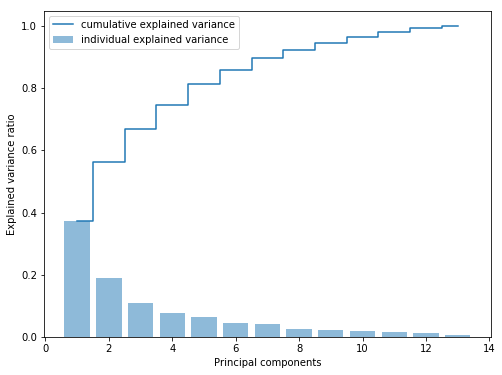

In [5]:
plt.figure(figsize=(8,6))
plt.bar( range(1, 14), var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 14), var_exp_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [6]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs[0:2]

[(4.8923083032737456,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592297,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461]))]

#### 1.2. 2D projection

In [7]:
# w = np.vstack((eigen_pairs[0][1], eigen_pairs[1][1])).T # same results
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print 'Matrix W:\n', w

Matrix W:
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [8]:
# trainsfer to priciple-space
X_train_pca = X_train_std.dot(w)

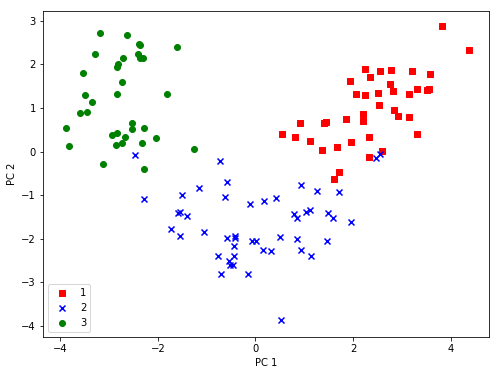

In [9]:
colors  = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
plt.figure(figsize=(8,6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

#### 1.3. 3D projection

In [10]:
w3 = np.vstack((eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1])).T # same results
print w3

[[ 0.14669811  0.50417079 -0.11723515]
 [-0.24224554  0.24216889  0.14994658]
 [-0.02993442  0.28698484  0.65639439]
 [-0.25519002 -0.06468718  0.58428234]
 [ 0.12079772  0.22995385  0.08226275]
 [ 0.38934455  0.09363991  0.18080442]
 [ 0.42326486  0.01088622  0.14295933]
 [-0.30634956  0.01870216  0.17223475]
 [ 0.30572219  0.03040352  0.1583621 ]
 [-0.09869191  0.54527081 -0.14242171]
 [ 0.30032535 -0.27924322  0.09323872]
 [ 0.36821154 -0.174365    0.19607741]
 [ 0.29259713  0.36315461 -0.09731711]]


In [11]:
X_train_pca3 = X_train_std.dot(w3)

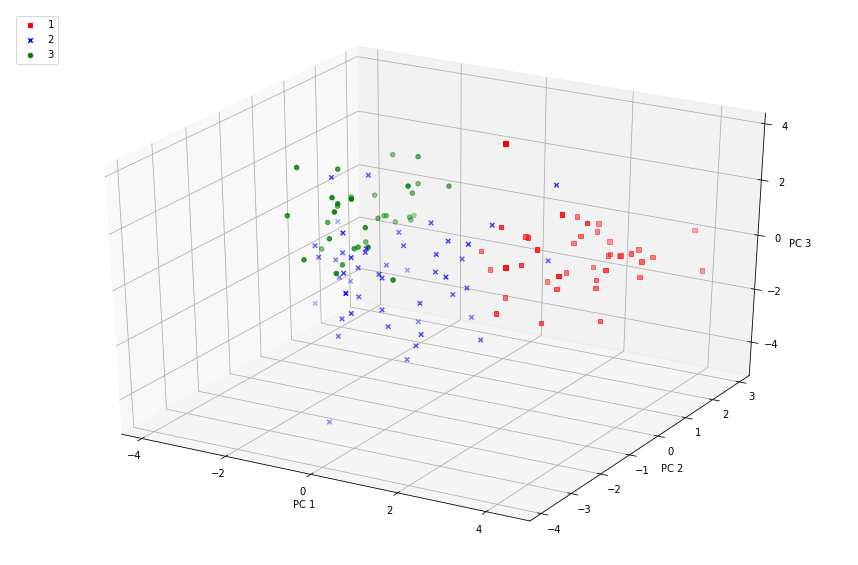

In [12]:
from mpl_toolkits.mplot3d import Axes3D
colors  = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(15,10))
ax  = fig.add_subplot(111, projection='3d')
for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca3[y_train==l, 0], 
               X_train_pca3[y_train==l, 1], 
               X_train_pca3[y_train==l, 2],
               c=c, label=l, marker=m)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend(loc='upper left')
plt.show()    

### 2. By Scikit-learn
#### 1.1. Get eigenvalue & eigenvactor

In [13]:
from sklearn.linear_model  import LogisticRegression
from sklearn.decomposition import PCA
from plot_decision_regions import *

In [14]:
pca = PCA(n_components=2)
lr = LogisticRegression()

In [15]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca  = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

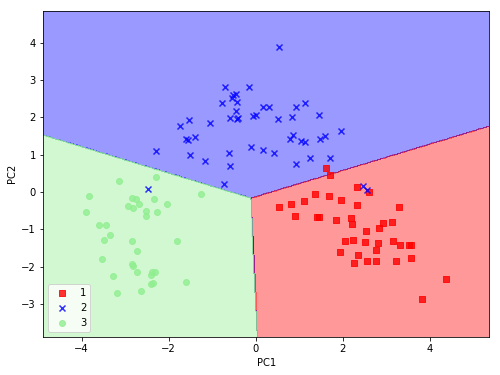

In [16]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

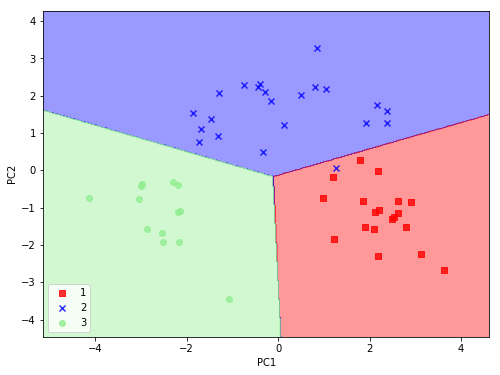

In [17]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [18]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

We can observe there seems be a miror symmetric between **numpy** and **scikit-learn**. It does not affect the categorization results, since they are just with $-1$ factor difference due to different tools.